In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
set.seed(9999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [19]:
df_default <- read_excel('data/default-cc-data.xls')  %>%
    select(-c(X1:X11))%>%
    rename(client_id = "...1", sep_bill = X12 , 
           aug_bill= X13 ,
           july_bill= X14,
           june_bill= X15,
           may_bill= X16, 
           april_bill=X17,
           sep_paid= X18 ,
           aug_paid= X19, 
           july_paid= X20, 
           june_paid= X21 ,
           may_paid= X22 ,
           april_paid= X23,
           default_status = Y)%>%
    slice(2:30001) %>%
    mutate_if(is.character, as.numeric) %>%
    mutate(client_id = as.character(client_id),
          default_status = case_when(default_status =="1"~"yes",
                                     default_status== "0"~"no"),
          default_status = as.factor(default_status)) 

New names:
* `` -> ...1



In [4]:
default_average = df_default %>%
mutate(average_bill = (sep_bill + aug_bill + july_bill + june_bill + may_bill +april_bill)/6,
      average_paid = (sep_paid + aug_paid + july_paid + june_paid + may_paid +april_paid)/6,
      total_bill = sep_bill + aug_bill + july_bill + june_bill + may_bill +april_bill,
      total_paid = sep_paid + aug_paid + july_paid + june_paid + may_paid +april_paid)

head(default_average)

client_id,sep_bill,aug_bill,july_bill,june_bill,may_bill,april_bill,sep_paid,aug_paid,july_paid,june_paid,may_paid,april_paid,default_status,average_bill,average_paid,total_bill,total_paid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,3913,3102,689,0,0,0,0,689,0,0,0,0,yes,1284.000,114.8333,7704,689
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,yes,2846.167,833.3333,17077,5000
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,no,16942.167,1836.3333,101653,11018
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,no,38555.667,1398.0000,231334,8388
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,no,18223.167,9841.5000,109339,59049
6,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,no,39685.667,1295.3333,238114,7772


**Column heading descriptions**

**client_id**: ID number associated with each client 

**credit_maximum**: Maximum amount of given credit in dollars ($)

**month_bill**: Amount billed on client statement in dollars ($)

**month_paid**: Amount of previous payment in dollars ($)

**default_status**: Default status of client for next month

**average_bi

In [18]:
set.seed(3456)

split_default <- initial_split(df_default, prop=0.75, strata =default_status) 
default_train <- training(split_default) 
default_test <- testing(split_default)

In [7]:
summary_default <- default_train %>%
    group_by(default_status) %>%
    summarize(n=n())

summary_default

`summarise()` ungrouping output (override with `.groups` argument)



default_status,n
<fct>,<int>
no,17523
yes,4977


Warning message:
“Removed 41 rows containing missing values (geom_point).”


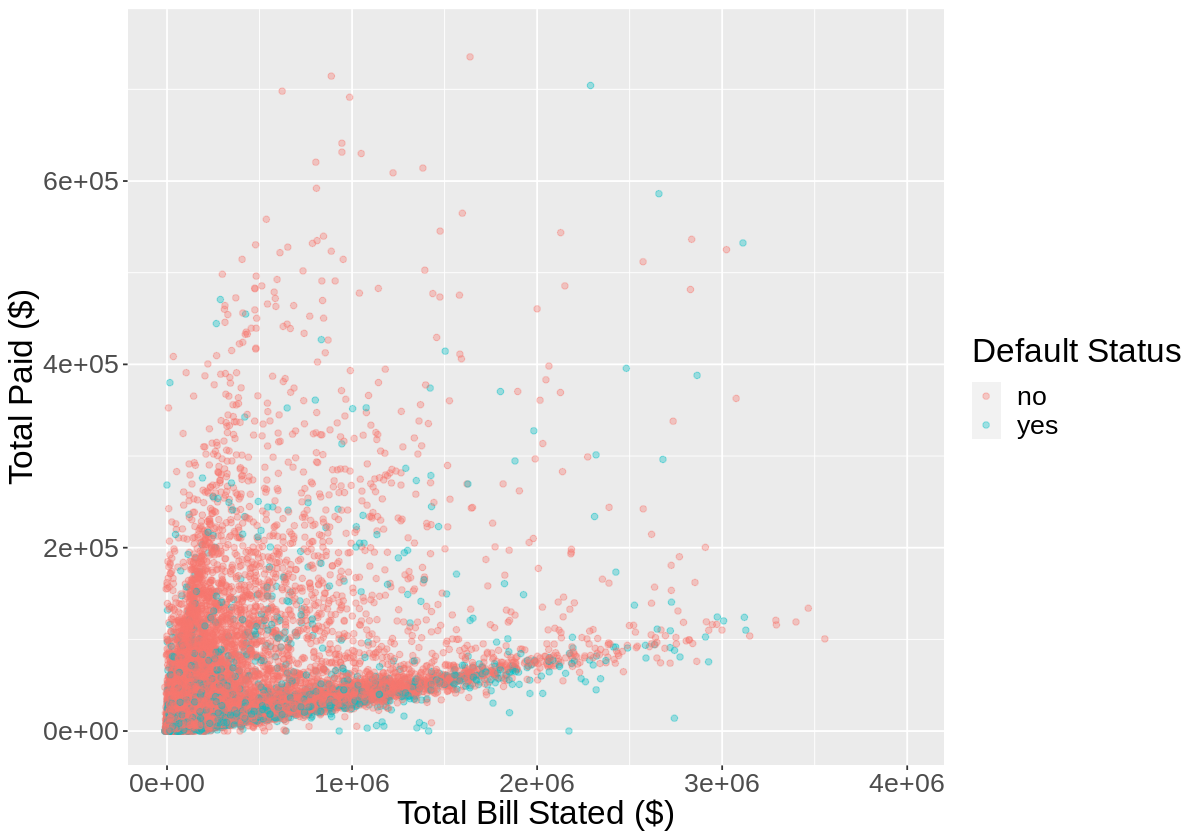

In [17]:
options(repr.plot.width = 10)
options(repr.plot.length = 10)

default_total <- default_average %>%
    ggplot(aes ( x = total_bill, y= total_paid, colour = default_status)) +
    geom_point(alpha = 0.35) +
    labs( x = "Total Bill Stated ($)", y= "Total Paid ($)", colour = "Default Status")+
    theme(text =element_text ( size = 20))+ 
    scale_x_continuous( limits= c(-12500, 4e+6))+
    scale_y_continuous(limits = c(0, 750000))

default_total